In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Dataset.csv'

In [6]:
df=pd.read_csv(path)

In [7]:
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.isnull().sum()
df = df.dropna()  # Or handle specific columns accordingly


In [11]:
import sys
from datetime import datetime


In [17]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in cat_cols:
    df[col] = df[col].fillna('Unknown')  # handle missing values
    df[col] = df[col].astype(str)        # ensure string type
    df[col] = le.fit_transform(df[col])  # apply encoding


In [20]:
# Safe preprocessing before train_test_split
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.dropna()  # or df.fillna(0)

X = df.drop(['aggregate_rating'], axis=1)
y = df['aggregate_rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test)


In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1.1201694876761883
R² Score: 0.5108498967311826


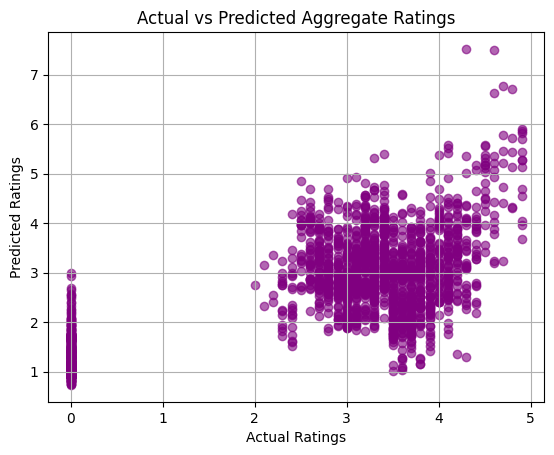

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Aggregate Ratings")
plt.grid(True)
plt.show()


In [26]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)


                 Feature   Coefficient
13   has_online_delivery  6.736047e-01
16           price_range  4.824453e-01
2           country_code  6.667082e-03
7              longitude  1.152602e-03
6       locality_verbose  6.227890e-04
19                 votes  4.740969e-04
1        restaurant_name  6.892236e-06
10  average_cost_for_two  7.081402e-07
15  switch_to_order_menu  0.000000e+00
0          restaurant_id -3.528815e-08
4                address -2.649922e-05
9               cuisines -2.229122e-04
5               locality -9.549830e-04
8               latitude -2.295412e-03
3                   city -3.016573e-03
12     has_table_booking -1.751525e-02
11              currency -8.936604e-02
14     is_delivering_now -1.774887e-01
17          rating_color -1.948716e-01
18           rating_text -2.016371e-01


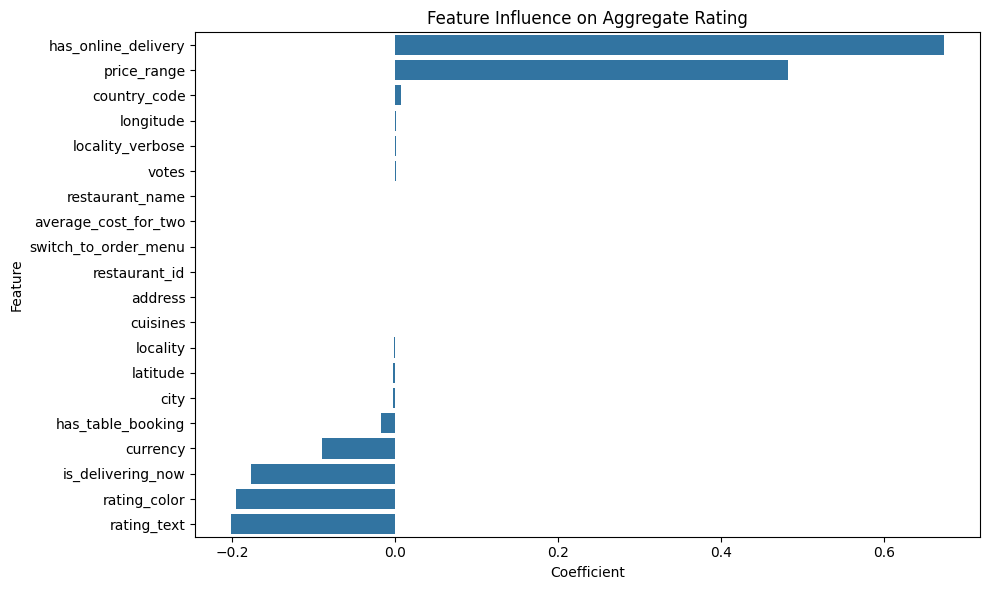

In [27]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Feature Influence on Aggregate Rating')
plt.tight_layout()
plt.show()
